In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split


In [2]:
# read olivetti faces dataset from sklearn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

print(faces.images.shape)
print(faces.data.shape)


(400, 64, 64)
(400, 4096)


In [3]:
def plot(images, n_cols=5):
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 4096:
        images = images.reshape((len(images), 64, 64))
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="gray", interpolation="nearest")
        plt.axis("off")


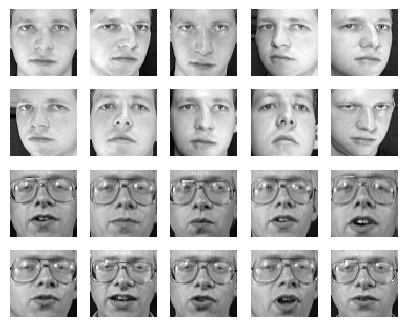

In [4]:
plot(faces.images[:20])

In [4]:
def mse(x, y):
    return np.mean((x - y)**2)

In [5]:
# implement PCA function
def PCA(X, n_components):
    # zero mean the data
    X -= X.mean(axis=0)
 
    cov = np.matmul(X.transpose(), X)

    # calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # sort the eigenvalues and eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # select the first n_components eigenvectors
    eigenvectors = eigenvectors[:, :n_components]
    # project the data
    X_pca = X.dot(eigenvectors)
    # X_pca.reshape(-1, 64, 64)
    return X_pca



In [7]:
# apply PCA to the faces dataset
X_pca = PCA(faces.data, 20)
print(X_pca.shape)


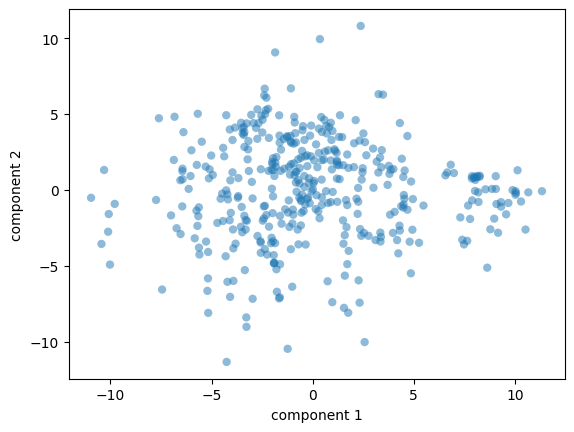

In [ ]:
# 2D plot of the first 2 principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()


C:\Users\ALI\AppData\Local\Temp\ipykernel_19640\4254544435.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], edgecolor='none', alpha=0.5,


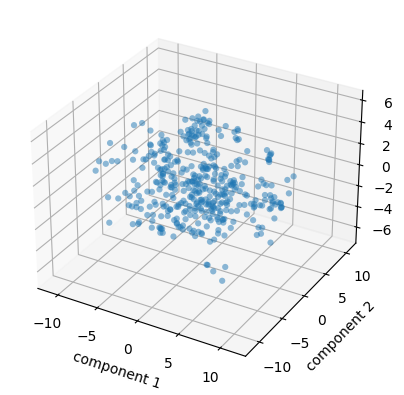

In [ ]:
# 3D plot of the first 3 principal components
X_pca = PCA(faces.data, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()


In [6]:
def reconstruct(X_pca,X, n_components):
    
    # calculate the eigenvectors
    cov = np.matmul(X.transpose(), X)

    eigenvalues, eigenvectors = np.linalg.eig(cov)
    # print(eigenvalues.shape)
    # sort the eigenvalues and eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # select the first n_components eigenvectors
    eigenvectors = eigenvectors[:, :n_components]
    # print(eigenvectors.T.shape)
    # print(X_pca.shape)
    # project the data
    X_reconstructed = X_pca.dot(eigenvectors.T) + X.mean(axis=0)
    return X_reconstructed



(4096,)


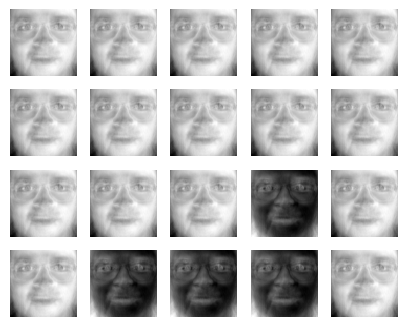

In [ ]:
# reconstructed faces k 1
X_pca = PCA(faces.data, 1)
X_reconstructed = reconstruct(X_pca,faces.data, 1)


plot(X_reconstructed[:20])

(4096,)


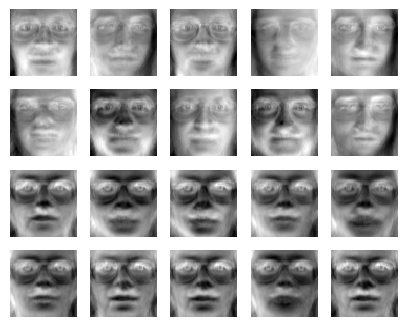

In [ ]:
# reconstructed faces k 20

X_pca = PCA(faces.data, 20)
X_reconstructed = reconstruct(X_pca,faces.data, 20)

plot(X_reconstructed[:20])



(4096,)


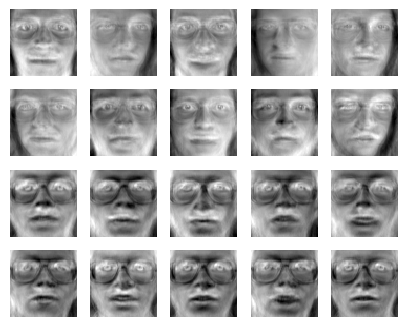

In [ ]:
# reconstructed faces k 50

X_pca = PCA(faces.data, 50)
X_reconstructed = reconstruct(X_pca,faces.data, 50)

plot(X_reconstructed[:20])


(4096,)


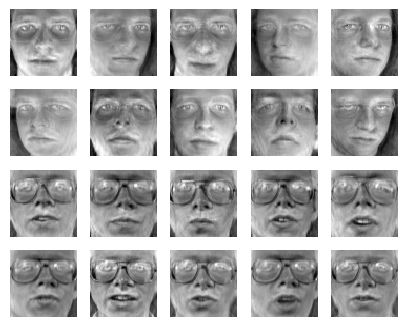

In [ ]:
# reconstructed faces k 150

X_pca = PCA(faces.data, 150)
X_reconstructed = reconstruct(X_pca,faces.data, 150)

plot(X_reconstructed[:20])


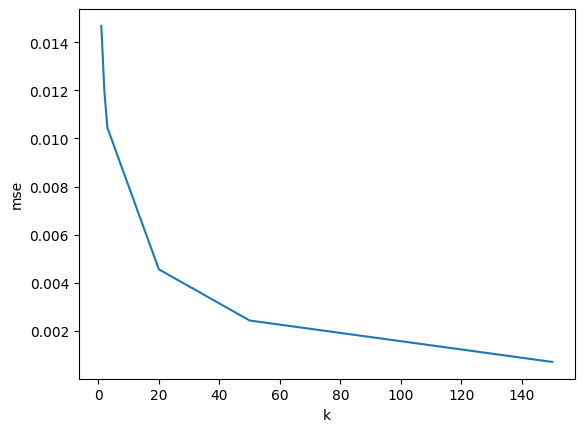

In [9]:
# plot the reconstruction error for different k
error = []
k_array = [1,2,3,20,50,150]
for k in k_array:
    X_pca = PCA(faces.data, k)
    X_reconstructed = reconstruct(X_pca,faces.data, k)
    error.append(mse(faces.data, X_reconstructed))
# plot mse vs k
plt.plot(k_array, error)
plt.xlabel('k')
plt.ylabel('mse')
plt.show()


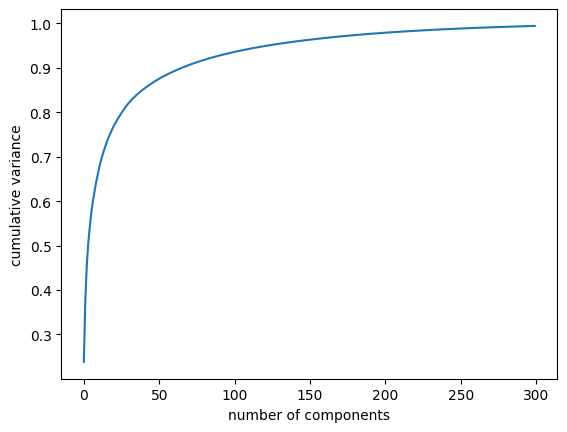

0.2381273  variance retained by first component 
0.543835  variance retained by first 5 component 
18  component need to retained 75% 
122  component need to retained 95% 


In [13]:
# plot cumulative variance retained by the first n principal components
def cumulative_variance(X):
    # zero mean the data
    X -= X.mean(axis=0)
    # calculate the covariance matrix
    cov = np.matmul(X.transpose(), X)

    # calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # sort the eigenvalues and eigenvectors
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # calculate the cumulative variance
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    
    return cumulative_variance



cumul_all = cumulative_variance(faces.data)
# plot the cumulative variance
plt.plot(cumul_all[:300])
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()
cumul_1 =  cumul_all[0]
cumul_5 = cumul_all[4]

print( cumul_1 , " variance retained by first component ")
print( cumul_5 , " variance retained by first 5 component ")

for i in range(0 , 300) :
    if cumul_all[i] >= 0.75 : 
        print( i , " component need to retained 75% ")
        break

for i in range(0 , 300) :
    if cumul_all[i] >= 0.95 : 
        print( i , " component need to retained 95% ")
        break



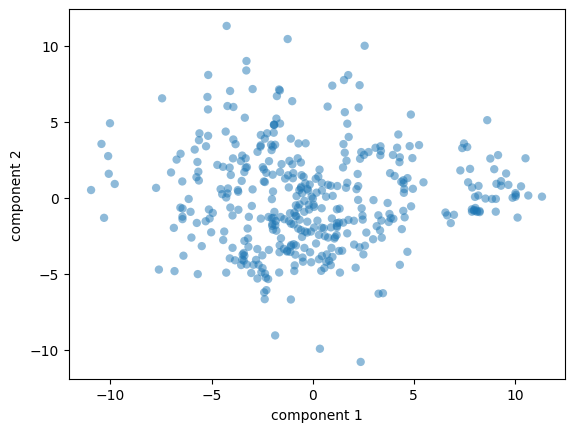

In [36]:
# implement PCA with sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(faces.data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()


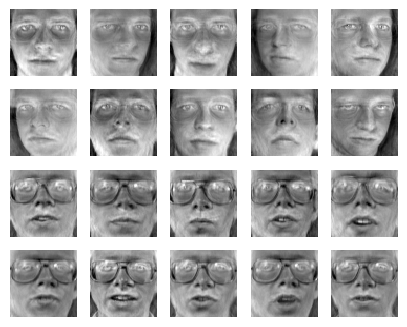

In [38]:
# reconstruct the original data skleran for k 150
pca = PCA(n_components=150)
X_pca = pca.fit_transform(faces.data)
X_reconstructed = pca.inverse_transform(X_pca)

plot(X_reconstructed[:20])
